Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sunny Kumar Tuladhar"
ID = "st122336"

---

# Lab 11: Unsupervised Learning with $k$-means

In this lab, we begin our survey of common unsupervised learning methods.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise With Synthetic Data

In this exercise, you will
write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Then you'll plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    There is a naive implementation of the algorithm in this notebook below. You can use it as
    a beginning point or make your own implementation from scratch.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a>
    function from sklearn to synthesize the dataset,
    or you can do it yourself with `np.random.multivariate_normal`. :)
</details>

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# YOUR CODE HERE
#raise NotImplementedError()

In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[ 0.51985897  4.86229547]
 [ 1.69246883  0.20598168]
 [ 1.35678894  4.36462484]
 [-1.5698694   3.01502873]
 [-1.63667453  2.37586395]]
y=
 [0 1 0 2 2]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data, separating the clusters by color.

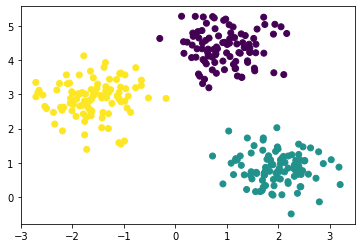

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c = y)

# YOUR CODE HERE
#raise NotImplementedError()

**Expected result** (or similar):

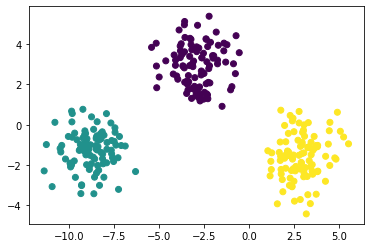

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

In [6]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances
import random
    

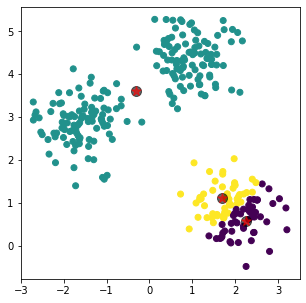

0.0


In [7]:
import numpy as np
from IPython.display import clear_output
import time

# 1. Initialize three random cluster centers
randomlist = random.sample(range(0, X.shape[0]),3)
centers = X[randomlist]
means =  np.zeros((centers.shape)) 

while True:
    
    # 2. Find the nearest cluster center for each point
    labels = pairwise_distances_argmin(X, centers)
    
    #print(labels)
    
    # 3. Plot the data showing the cluster centers. Do not forget to use clear_output.
    #new_centers = centers
    # plt.figure(figsize=(5, 5))
    # #plt.title(f"Iteration: {iter_}")
    # plt.scatter(X[:, 0], X[:, 1], c=labels)
    # plt.scatter(centers[:, 0], centers[:, 1], s=100,marker = 'o', c="black", alpha=0.6)
    # plt.show()
        
    # 4. Find the mean of the points assigned to each cluster center
    for i in range(centers.shape[0]):
        means[i] = np.mean(X[np.where(labels == i)],axis = 0)
        
    plt.figure(figsize=(5, 5))
    #plt.title(f"Iteration: {iter_}")
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], s=100,marker = 'o', c="black", alpha=0.6)
    plt.scatter(means[:, 0], means[:, 1], s=100,marker = '*', c="red", alpha=0.6)
    plt.show()
        
    # 5. Calculate the sum squared error between the currently assigned points' mean
    #    and the current center. If this error is less than 1e-6, stop the loop.
    
    error = 0.0    
    for i in range(centers.shape[0]):
        error += ((means[i,:] - centers[i,:])**2).sum()
        
    print(error)
    if error < 1e-6:
        break
    else:
        centers = means 
    
    time.sleep(1)
    clear_output()

# YOUR CODE HERE
#raise NotImplementedError()

In [8]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[ 2.24762407  0.57894516]
 [-0.31749569  3.61475665]
 [ 1.70105268  1.10096071]]
success!


**Expected result** (or similar):

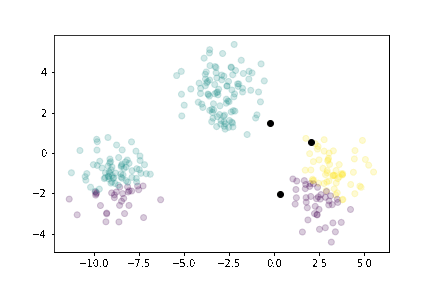

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [10]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [11]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

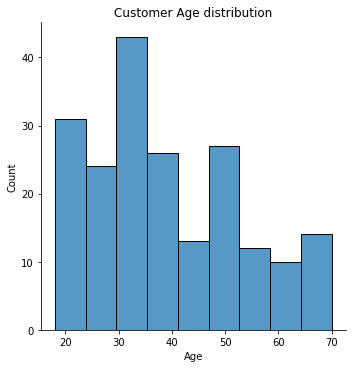

In [12]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

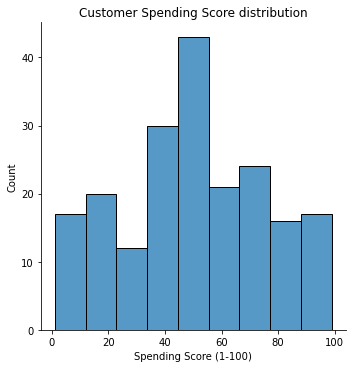

In [13]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

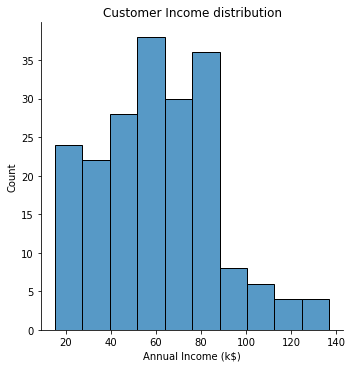

In [14]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

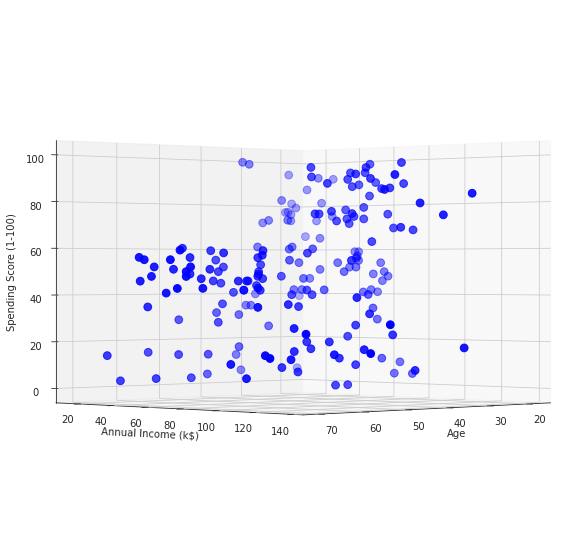

In [15]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [16]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
        
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

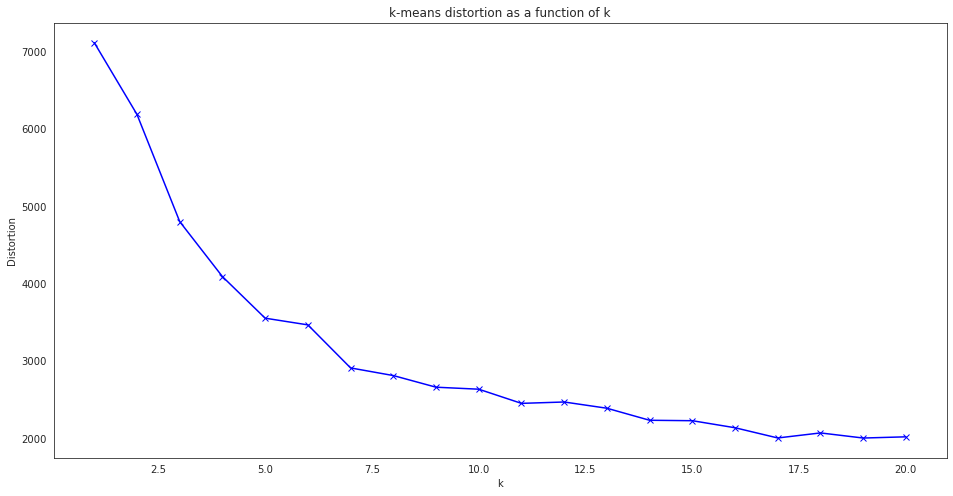

In [17]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

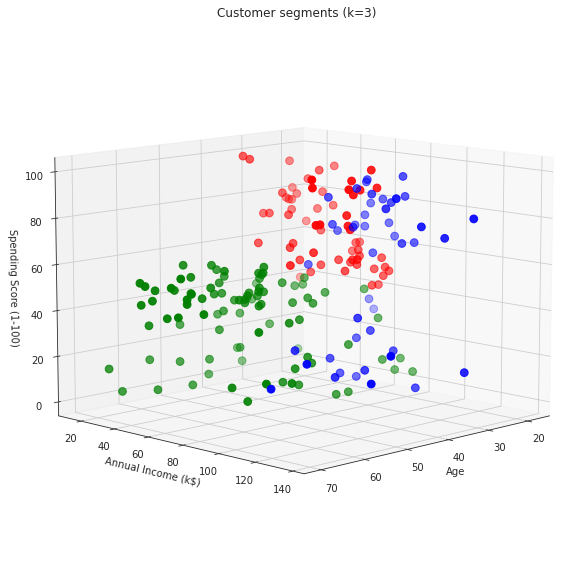

In [18]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(10, 45)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

In this exercise we'll try to understand the three clusters above and also do a better job with the elbow plot.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [18]:
# YOUR CODE HERE
print('Gender distribution in lable 0 is \n ', (df['Gender'].loc[df['label'] == 0].value_counts()))
print('Gender distribution in lable 1 is \n ',(df['Gender'].loc[df['label'] == 1].value_counts()))
print('Gender distribution in lable 2 is \n ',(df['Gender'].loc[df['label'] == 2].value_counts()))
print('*' * 10)
print('Average age in label 0 is ', df['Age'].loc[df['label'] == 0].mean())
print('Average age in label 1 is ', df['Age'].loc[df['label'] == 1].mean())
print('Average age in label 2 is ', df['Age'].loc[df['label'] == 2].mean())

Gender distribution in lable 0 is 
  Female    22
Male      13
Name: Gender, dtype: int64
Gender distribution in lable 1 is 
  Male      20
Female    18
Name: Gender, dtype: int64
Gender distribution in lable 2 is 
  Female    72
Male      55
Name: Gender, dtype: int64
**********
Average age in label 0 is  47.65714285714286
Average age in label 1 is  40.39473684210526
Average age in label 2 is  35.960629921259844


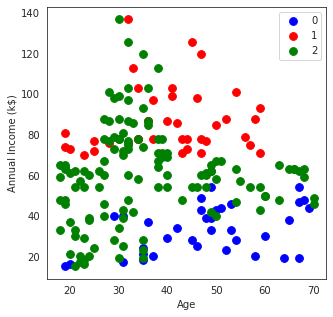

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],  c='blue', s=60 , label = '0')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1],  c='red', s=60, label = '1')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2],  c='green', s=60, label = '2')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

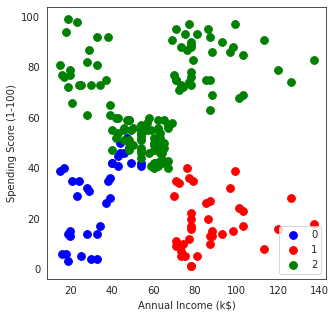

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0],  c='blue', s=60 , label = '0')
ax.scatter(df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1],  c='red', s=60, label = '1')
ax.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2],  c='green', s=60, label = '2')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The clusters have been separated mainly with Annual Income Rates. The Highest earners in the 2nd cluster and lowest earners in the 1st cluster. 

The Gender seems to be roughly evenly distributed between the clusters.

- Cluster 0 has Low to middle annual income earners but medium to high spending scores. The average age is 47. So these are middle aged people. with low income and average spending habits.

- Cluster 1 has low Annual Income and Very High Spending scores with mostly younger people. Average age is 28. These seemed to be  youngsters like to spend a lot.


- Cluster 2 has high Annual Income and low to high spending scores. The average age is 40. So these are also middle aged people who earn a lot  but dont like to spend too much. They like to save money it seems.

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perform, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

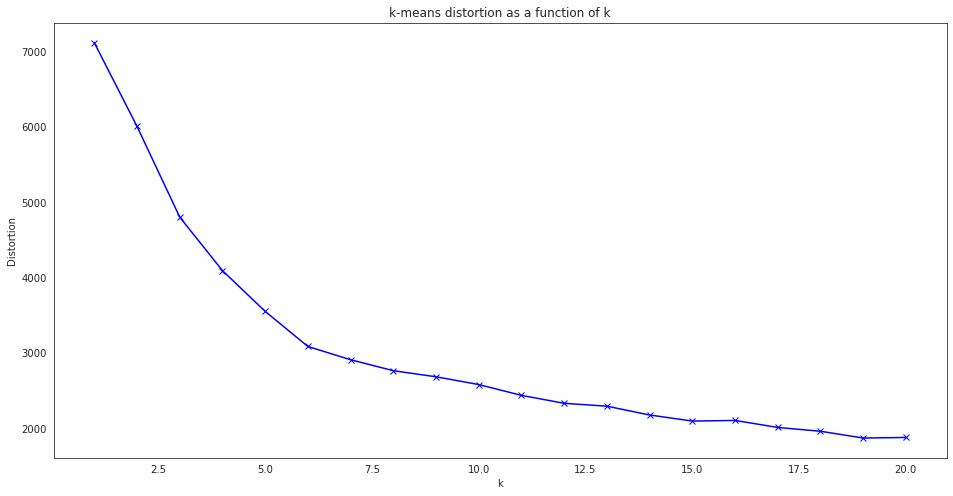

In [21]:
# YOUR CODE HERE
no_of_init = 10 #try 10 different initialisations

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

After taking several initialisations of the centers we get a much smoother curve with the distortions as we choose over a wider range of possibilities for the initial value. The Curve seems to "elbow" at k = 6 the most.

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [22]:
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install kmeans-pytorch
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install tqdm

In [23]:
import torch
from kmeans_pytorch import kmeans

In [24]:
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 13it [00:00, 658.72it/s, center_shift=0.000000, iteration=13, tol=0.000100]


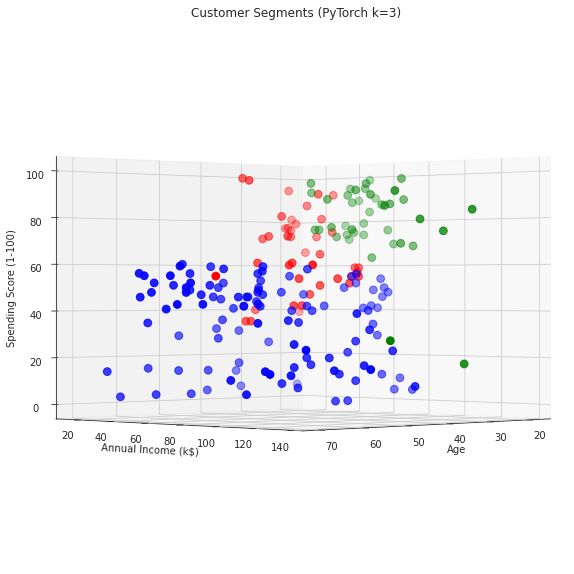

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

dataset used https://www.kaggle.com/arjunbhasin2013/ccdata.

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [26]:
df_cc = pd.read_csv("CC GENERAL.csv")

In [27]:
df_cc[:5]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
#we wil only use 4 columns for simplicity and take only 1000 samples
df_cc = df_cc[['BALANCE','PURCHASES','PAYMENTS','CASH_ADVANCE']]

In [29]:
df_cc.isna().sum()

BALANCE         0
PURCHASES       0
PAYMENTS        0
CASH_ADVANCE    0
dtype: int64

<AxesSubplot:>

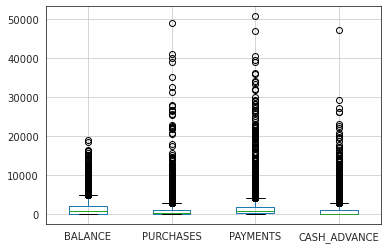

In [30]:
df_cc.boxplot()
# we can see there are too many outliers, so we shall remove them first

In [31]:
# df_cc = df_cc[~(df_cc == 0).any(axis=1)]
# df_cc

In [32]:
df_cc.describe()

,BALANCE,PURCHASES,PAYMENTS,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,1733.143852,978.871112
std,2081.531879,2136.634782,2895.063757,2097.163877
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,383.276166,0.000000
50%,873.385231,361.280000,856.901546,0.000000
75%,2054.140036,1110.130000,1901.134317,1113.821139
max,19043.138560,49039.570000,50721.483360,47137.211760


In [34]:
Q1 = df_cc.quantile(0.25)
Q3 = df_cc.quantile(0.75)

#we only take data within the Quartiles
df_cc = df_cc[~((df_cc < (Q1)) |(df_cc > (Q3))).any(axis=1)]

<AxesSubplot:>

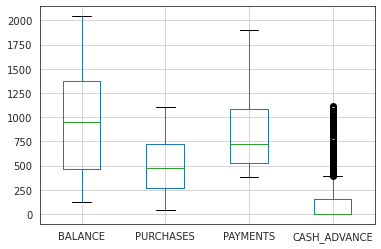

In [35]:
df_cc.boxplot()
#the plot is a lot more manageable now compared to previously

In [36]:
df_cc.shape

(949, 4)

In [37]:
X = np.array(df_cc)

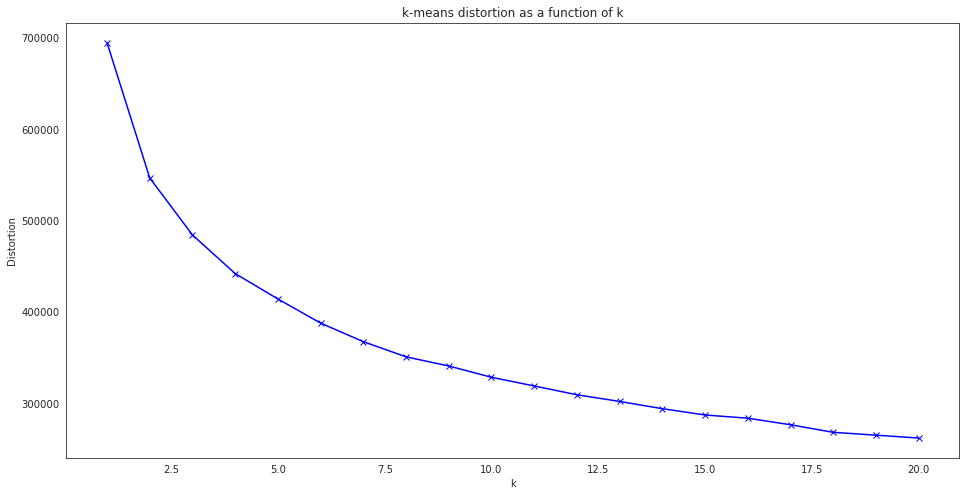

In [38]:
# YOUR CODE HERE
no_of_init = 5 #try 5 different initialisations

# Convert dataframe to matrix

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

In [39]:
#There Seems to be a good elbow at around 4 cluster so lets try that.
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=4, distance='euclidean', device=torch.device(device))
df_cc["label"] = c

running k-means on cpu..


[running kmeans]: 13it [00:00, 508.10it/s, center_shift=0.000000, iteration=13, tol=0.000100]   


In [40]:
df_cc[:5]

,BALANCE,PURCHASES,PAYMENTS,CASH_ADVANCE,label
7,1823.652743,436.20,679.065082,0.000000,1
8,1014.926473,861.49,688.278568,0.000000,1
10,1293.124939,920.12,1083.301007,0.000000,1
18,1989.072228,504.35,1720.837373,0.000000,1
26,1615.967240,102.00,890.178845,244.840485,1


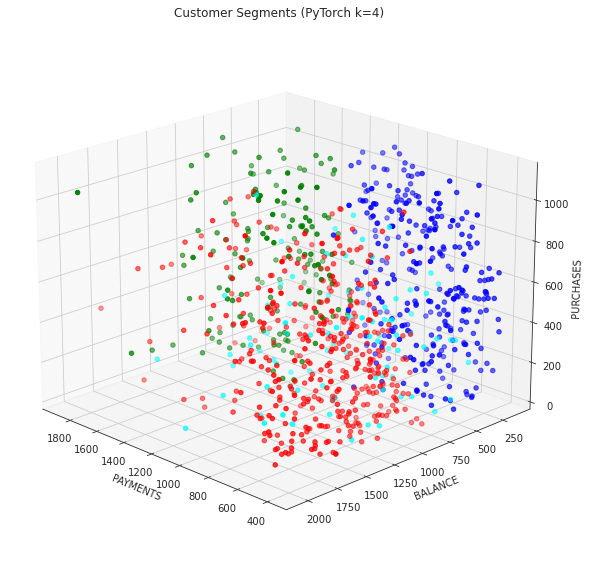

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cc.PAYMENTS[df_cc.label == 0], df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 1], df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 2], df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 3], df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan')
ax.view_init(20, 135)
plt.xlabel("PAYMENTS")
plt.ylabel("BALANCE")
ax.set_zlabel('PURCHASES')
plt.title('Customer Segments (PyTorch k=4)')
plt.show()

In [42]:
#Since CASH_ADVANCE has mostly 0 values we will the other three instead

In [43]:
df_cc[:5]

,BALANCE,PURCHASES,PAYMENTS,CASH_ADVANCE,label
7,1823.652743,436.20,679.065082,0.000000,1
8,1014.926473,861.49,688.278568,0.000000,1
10,1293.124939,920.12,1083.301007,0.000000,1
18,1989.072228,504.35,1720.837373,0.000000,1
26,1615.967240,102.00,890.178845,244.840485,1


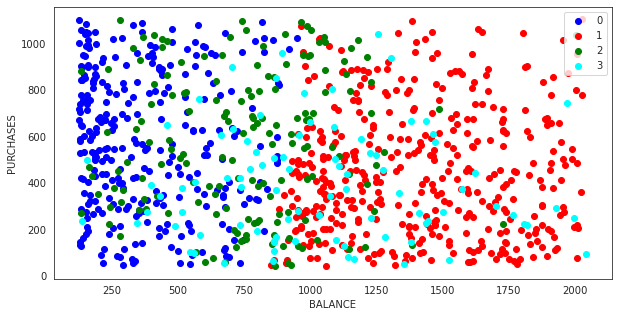

In [44]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue',label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red',label = 1)
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend()
plt.show()

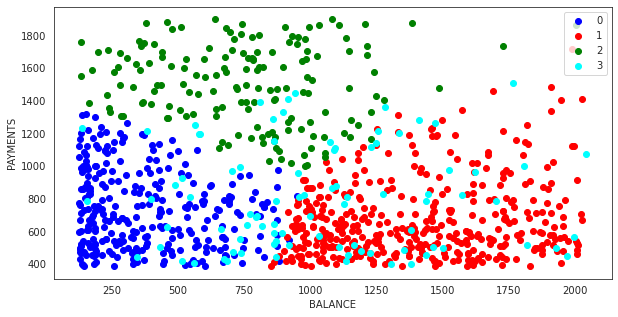

In [45]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PAYMENTS"][df_cc.label == 0], c='blue', label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PAYMENTS"][df_cc.label == 1], c='red',label = 1 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PAYMENTS"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PAYMENTS"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")
plt.legend()
plt.show()

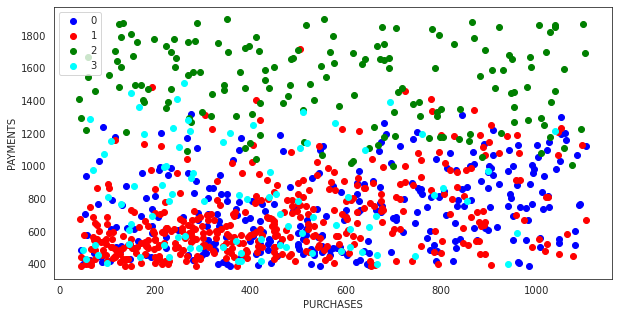

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["PURCHASES"][df_cc.label == 0], df_cc["PAYMENTS"][df_cc.label == 0], c='blue', label = 0 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 1], df_cc["PAYMENTS"][df_cc.label == 1], c='red',label = 1 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 2], df_cc["PAYMENTS"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 3], df_cc["PAYMENTS"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("PURCHASES")
plt.ylabel("PAYMENTS")
plt.legend()
plt.show()

We can see from the aobve plots that the 4 clusters are most distinct with the balance and paymentsPurchase seem to be evenly distributed across the all the clusters.
Ignoring the people with 0 Cash_Advance we can see that is also evenly distributed among the 4 clusters.
The major separators are the Balance and Payments.

- Cluster 0 includes people with low to average balance and with high payments.

- Cluster 1 includes people iwht medium balance and low payments

- CLuster 2 includes people with low payments and low balance

- cluster 3 includes people with high balances and low payments. These people seem to be money savers.